In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [108]:
def determitate_label(column: str) -> str:
    if "zerofl" in column:
        if "lda1000.0" in column:
            return "ZeroFL_lda1000.0"
        elif "lda1.0" in column:
            return "ZeroFL_lda1.0"
        elif "lda0.1" in column:
            return "ZeroFL_lda0.1"
    if "powerprop-a1.0-s0.9" in column:
        if "lda1000.0" in column:
            return "Resnet18_topk_lda1000.0"
        elif "lda1.0" in column:
            return "Resnet18_topk_lda1.0"
        elif "lda0.1" in column:
            return "Resnet18_topk_lda0.1"
    if "powerprop-a1.0-s0.0" in column:
        if "lda1000.0" in column:
            return "Resnet18_lda1000.0"
        elif "lda1.0" in column:
            return "Resnet18_lda1.0"
        elif "lda0.1" in column:
            return "Resnet18_lda0.1"
    if "power_swat" in column:
        if "lda1000.0" in column:
            return "PowerSwat_lda1000.0"
        elif "lda1.0" in column:
            return "PowerSwat_lda1.0"
        elif "lda0.1" in column:
            return "PowerSwat_lda0.1"
    if "resnet" in column:
        if "lda1000.0" in column:
            return "Resnet18_lda1000.0"
        elif "lda1.0" in column:
            return "Resnet18_lda1.0"
        elif "lda0.1" in column:
            return "Resnet18_lda0.1"

Data preparation


In [109]:
# Load the data from CSV files

accuracy_data = pd.read_csv("sparsity_consumption_95_acc3.csv")
sparsity_data = pd.read_csv("sparsity_consumption_95_3.csv")

# accuracy_data = pd.read_csv('sparsity_consumption_90_acc3.csv')
# sparsity_data = pd.read_csv('sparsity_consumption_90_3.csv')

In [110]:
# Find common indices
common_indices = accuracy_data.index.intersection(sparsity_data.index)

# Filter dataframes to keep only common indices
accuracy_data = accuracy_data.loc[common_indices]
sparsity_data = sparsity_data.loc[common_indices]


# Remove columns containing "MIN" and "MAX" from accuracy_data
columns_to_drop = [
    col
    for col in accuracy_data.columns
    if "MIN" in col or "MAX" in col or "lda1000.0" not in col
]
accuracy_data = accuracy_data.drop(columns=columns_to_drop)
# rename the columns using determitate_label function
accuracy_data.columns = [determitate_label(col) for col in accuracy_data.columns]


# Remove columns containing "MIN" and "MAX" from sparsity_data
columns_to_drop = [
    col
    for col in sparsity_data.columns
    if "MIN" in col or "MAX" in col or "lda1000.0" not in col
]
sparsity_data = sparsity_data.drop(columns=columns_to_drop)
# rename the columns using determitate_label function
sparsity_data.columns = [determitate_label(col) for col in sparsity_data.columns]
sparsity_data = (100 - sparsity_data + 5) / 100 * 11000000

sparsity_data["Resnet18_lda1000.0"] = 2 * 11000000

# Compute cumulative communication cost for each column
communication_cost_data = sparsity_data.cumsum()


# Check if both data frames have the same index/labels
print(accuracy_data.columns)
print(sparsity_data.columns)
if not accuracy_data.columns.equals(sparsity_data.columns):
    raise ValueError("The labels in accuracy.csv and sparsity.csv do not match.")


# Extract the labels
labels = accuracy_data.columns

Index(['ZeroFL_lda1000.0', 'Resnet18_lda1000.0', 'PowerSwat_lda1000.0',
       'Resnet18_topk_lda1000.0'],
      dtype='object')
Index(['ZeroFL_lda1000.0', 'Resnet18_lda1000.0', 'PowerSwat_lda1000.0',
       'Resnet18_topk_lda1000.0'],
      dtype='object')


In [111]:
def moving_average(data, window_size):
    return data.rolling(window=window_size, min_periods=1).mean()

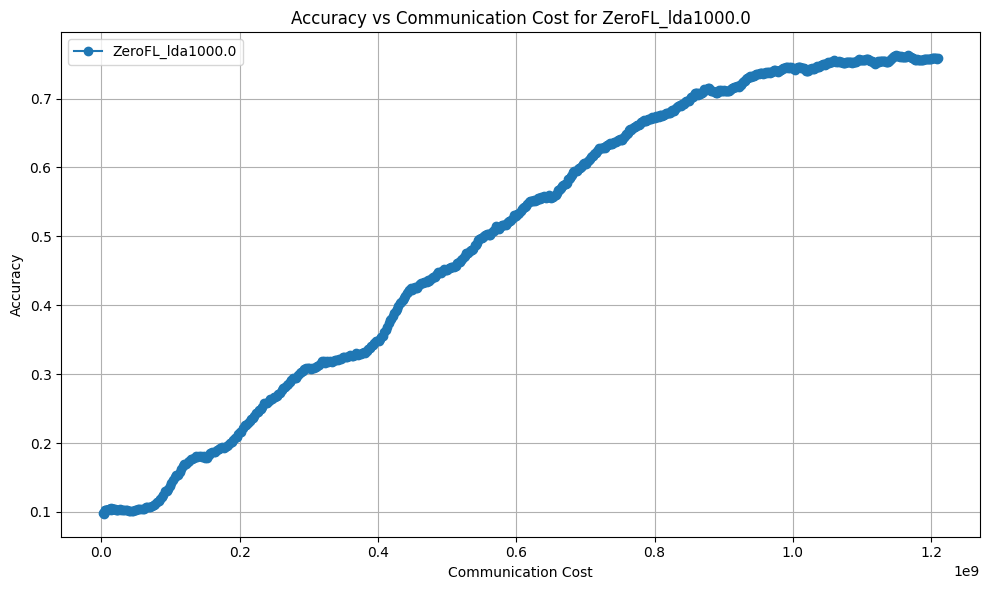

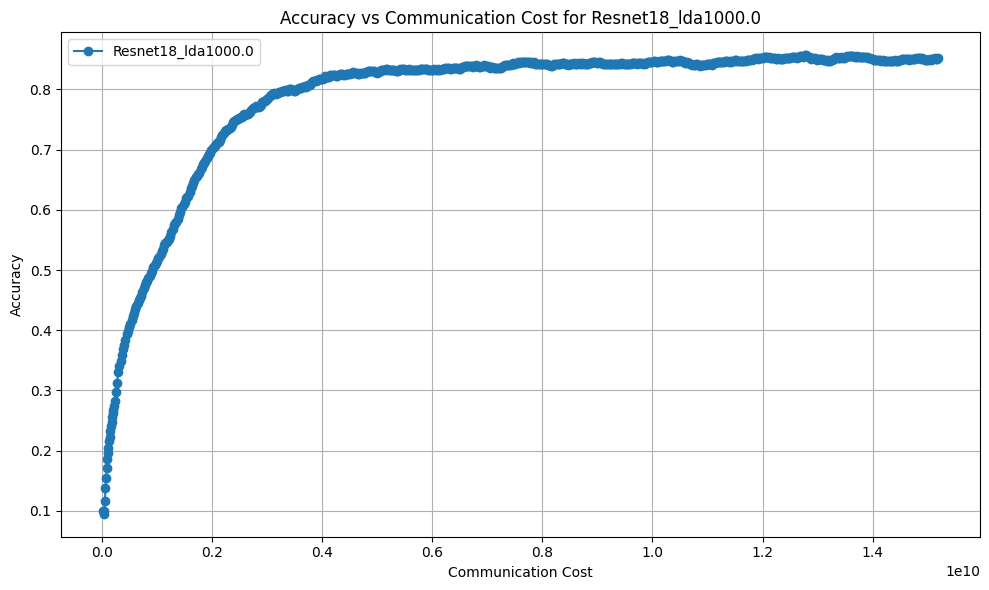

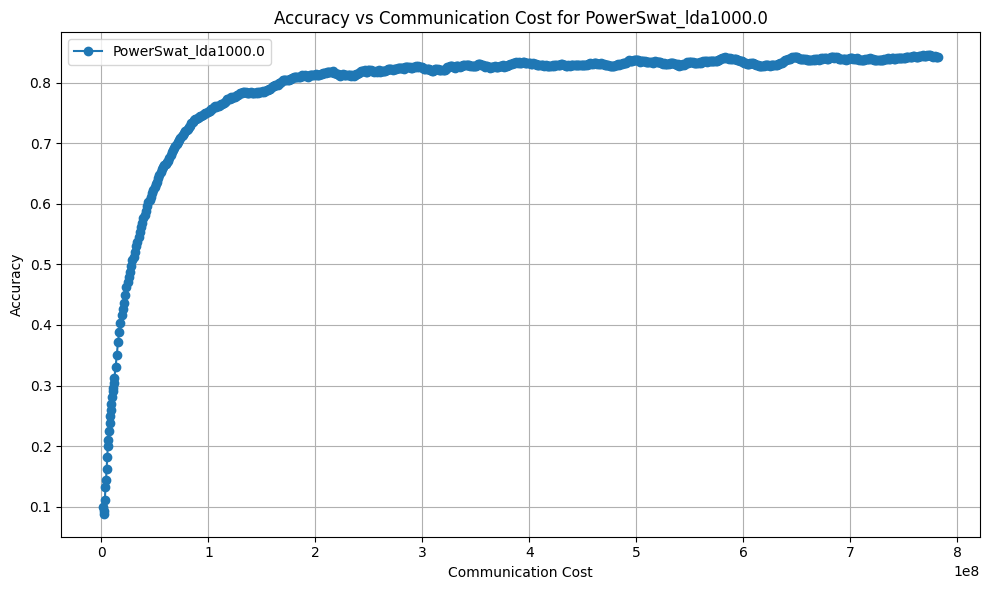

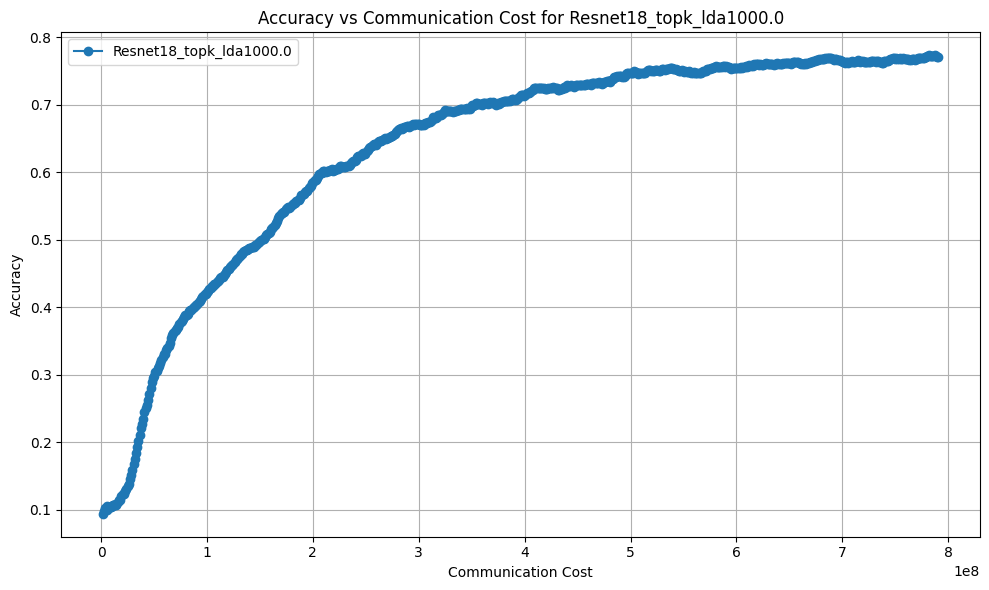

In [112]:
# Window size for moving average
window_size = 20

# Iterate through each model column and plot accuracy vs communication cost
for column in accuracy_data.columns:
    smoothed_accuracy = moving_average(accuracy_data[column], window_size)
    smoothed_communication_cost = moving_average(
        communication_cost_data[column], window_size
    )

    plt.figure(figsize=(10, 6))
    plt.plot(smoothed_communication_cost, smoothed_accuracy, marker="o", label=column)
    plt.xlabel("Communication Cost")
    plt.ylabel("Accuracy")
    plt.title(f"Accuracy vs Communication Cost for {column}")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

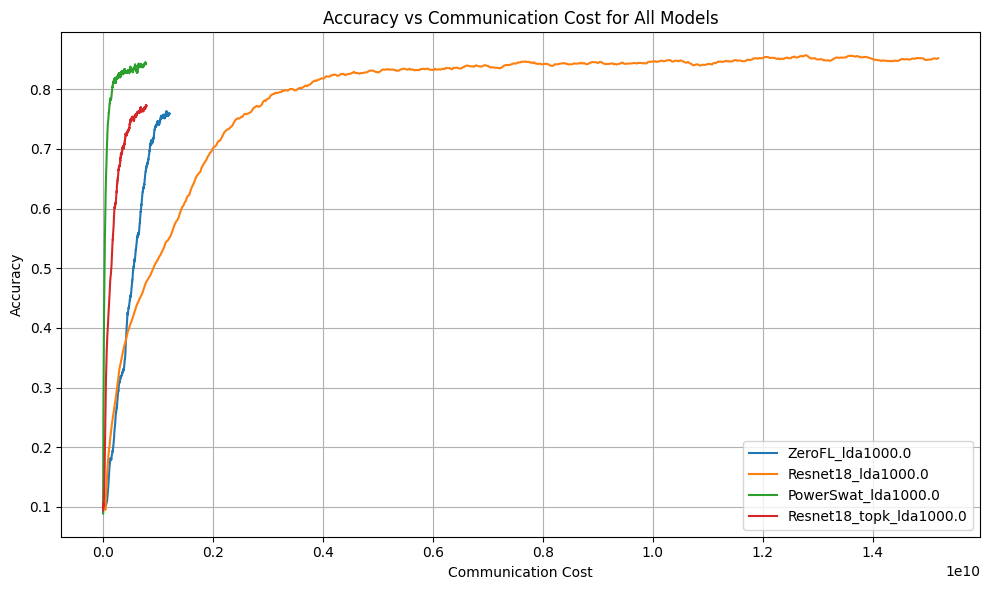

In [113]:
plt.figure(figsize=(10, 6))
for column in accuracy_data.columns:
    smoothed_accuracy = moving_average(accuracy_data[column], window_size)
    smoothed_communication_cost = moving_average(
        communication_cost_data[column], window_size
    )

    plt.plot(smoothed_communication_cost, smoothed_accuracy, label=column)
plt.xlabel("Communication Cost")
# plt.xscale('log')
plt.ylabel("Accuracy")
plt.title("Accuracy vs Communication Cost for All Models")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

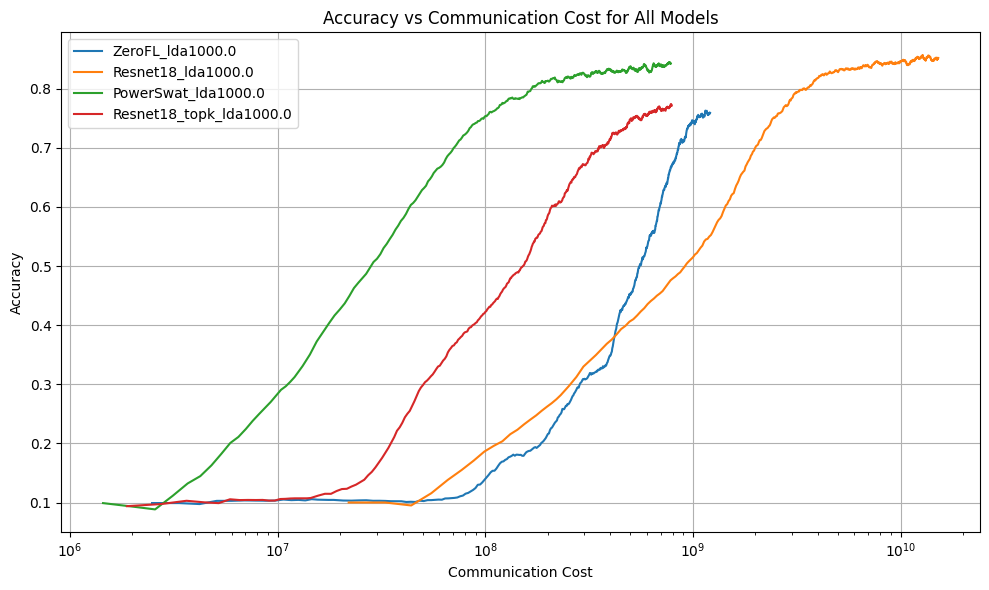

In [114]:
plt.figure(figsize=(10, 6))
for column in accuracy_data.columns:
    smoothed_accuracy = moving_average(accuracy_data[column], window_size)
    smoothed_communication_cost = moving_average(
        communication_cost_data[column], window_size
    )

    plt.plot(smoothed_communication_cost, smoothed_accuracy, label=column)
plt.xlabel("Communication Cost")
plt.xscale("log")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Communication Cost for All Models")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()